In [1]:
from fastai import *
from fastai.vision import *
from fastai.callback import *
from fastai.vision.all import *
from fastai.distributed import *
from fastai.metrics import *
from fastai.callback.tracker import SaveModelCallback

In [2]:
from models.backbone import Backbone
from models.encoder import EncoderModule
from models.utils.joiner2 import *
from models.utils.losses import Attention_penalty_factor, Generator_loss, CriticLoss
from models.utils.metrics import Accuracy
from models.unet import UNet
import torchvision.transforms as T
import torchvision.transforms as T
from torchvision import datasets, transforms, models
from collections import defaultdict, deque
import itertools

In [3]:
H = 32
W= 32
bs = 5

In [6]:
path = untar_data(URLs.CIFAR)

transforms = ([*aug_transforms(),Normalize.from_stats([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(H,W),
                 batch_tfms=transforms)

dloader = data.dataloaders(path,bs=bs,device='cuda') 

In [7]:
class Generator_loss2(nn.Module):
    def __init__(self, beta=0.00005, gamma=0.005,sigma=1):
        super().__init__()
        self.beta = beta
        self.gamma = gamma
        self.sigma = sigma

    def forward(self, images, label):
        #print(images.shape)
        #print(labels.shape)
        #Computing the Attention Loss
        #LCA = Curating_of_attention_loss()
        #Latt = LCA(pattn)
        #print(noised.shape)
        #print(original_image.shape)
        #print(label.shape)
        MSE = nn.MSELoss()
        Lrec = MSE(images[0],images[1])

        #Lg = self.beta*Latt - self.gamma*model_loss + self.sigma*Lrec

        return Lrec

In [8]:
loss = Generator_loss2()

In [10]:
model = UNet(3,3,bilinear=False)

In [9]:
save = SaveModelCallback(monitor='MSE', fname='Generator')

In [14]:
model_path = Path.home()/'Luiz/saved_models'
learn = Learner(dloader, model, loss_func=loss, metrics=[], model_dir=model_path)

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=7.585775892948732e-05)

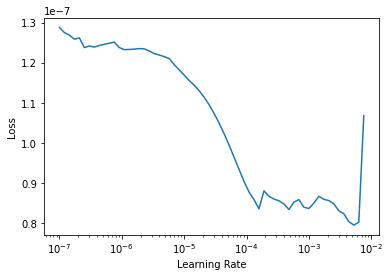

In [15]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(2,0.00001)

epoch,train_loss,valid_loss,time
0,0.000000,0.000000,06:05
1,0.000000,0.000000,06:02
